## data Ingestion

In [1]:
import pandas as pd

# Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.therefore the given problem statement is to perform clustering to summarize customer segments.

### about the dataset columns

1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise
11. MntWines: Amount spent on wine in last 2 years
12. MntFruits: Amount spent on fruits in last 2 years
13. MntMeatProducts: Amount spent on meat in last 2 years
14. MntFishProducts: Amount spent on fish in last 2 years
15. MntSweetProducts: Amount spent on sweets in last 2 years
16. MntGoldProds: Amount spent on gold in last 2 years
17. NumDealsPurchases: Number of purchases made with a discount
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
24. NumWebPurchases: Number of purchases made through the company’s website
25. NumCatalogPurchases: Number of purchases made using a catalogue
26. NumStorePurchases: Number of purchases made directly in stores
27. NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
data = pd.read_csv("E:\\projects\\internship_project\\notebooks\\data\\marketing_campaign.csv",sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.shape

(2240, 29)

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## observations

1. there are no duplicate values
2. in the income column, there are 24 entries with null values.we will handle them by removing those rows.
3. Dt_customer column is not in the date format . we will convert ic accordingly

In [7]:
data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [4]:
## deleting these columns
data.dropna(inplace=True)

In [8]:
data.shape

(2216, 29)

In [5]:
# converting Dt_customer column in the datetime object

data["Dt_Customer"] = data["Dt_Customer"].apply(
    pd.to_datetime, errors="coerce"
)

C:\Users\Swetha\AppData\Local\Temp\ipykernel_42836\4230221582.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Dt_Customer"] = data["Dt_Customer"].apply(


In [10]:
data["Dt_Customer"]

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [11]:
data["Dt_Customer"].min(),data["Dt_Customer"].max()

(Timestamp('2012-01-08 00:00:00'), Timestamp('2014-12-06 00:00:00'))

## EDA - Understanding the data

# checking the numerical and categorical columns


In [6]:
numerical_columns = data.columns[data.dtypes!="object"]
categorical_columns = data.columns[data.dtypes == "object"]

In [13]:
numerical_columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [14]:
categorical_columns

Index(['Education', 'Marital_Status'], dtype='object')

In [15]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
## Understanding the age distribution
data['Age'] = 2024 - data['Year_Birth']


<Axes: xlabel='Age'>

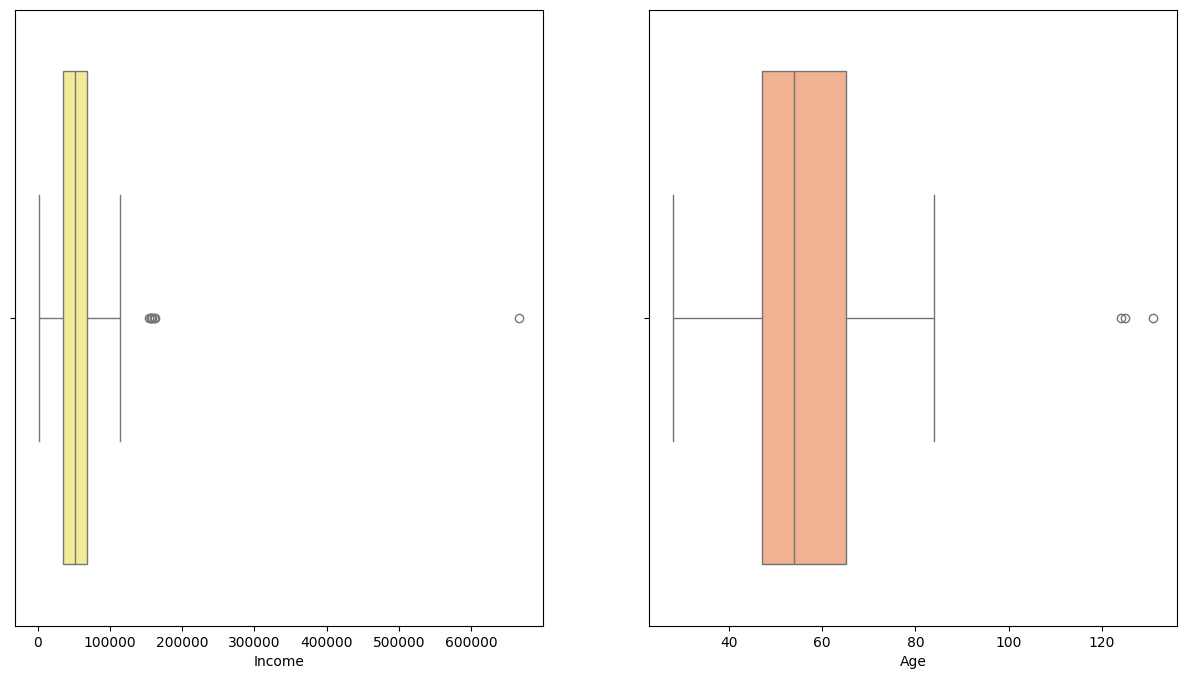

In [8]:


#checking the ouliers in age and income columns.
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette(["#FFF78A",'#FFE382','#FFC47E','#FFAD84','#B4F8C8'])
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel='income'
sns.boxplot(data=data,x='Income',color=palette[0])
plt.subplot(1,2,2)
plt.xlabel='age'
sns.boxplot(data=data,x='Age',color=palette[3])

### observations
1. there are outliers in the age and income data 
2. we will remove the outliers


In [9]:
#delete the outliers..
#from age column
data = data[data['Age'] < 80]
#from income column
data=data[data['Income']<150000]




<Axes: xlabel='Age'>

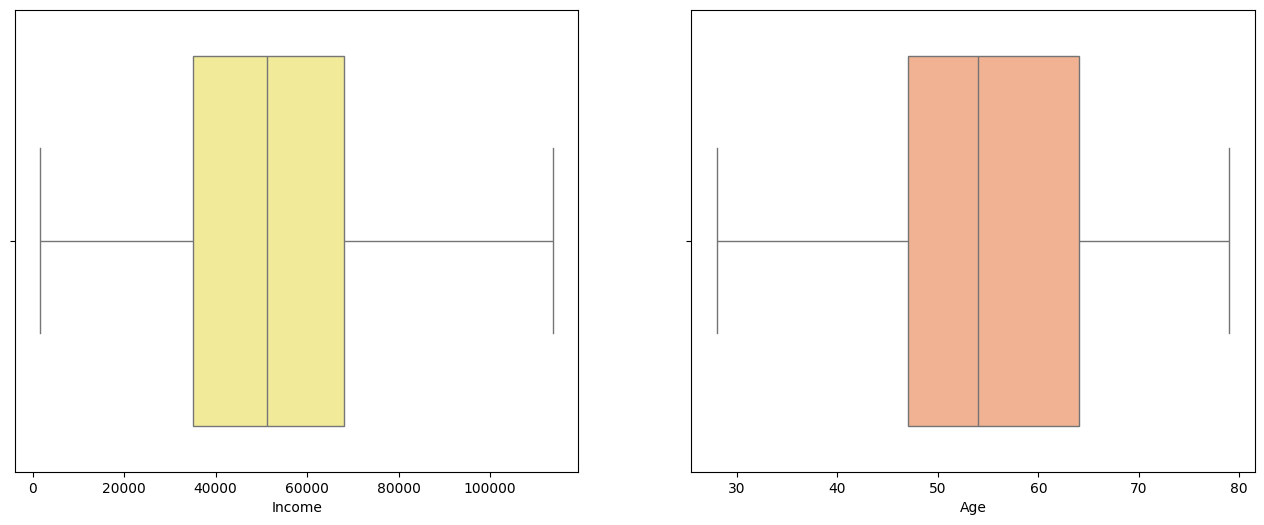

In [10]:

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.xlabel='income'
sns.boxplot(data=data,x='Income',color = palette[0])
plt.subplot(1,2,2)
plt.xlabel='age'
sns.boxplot(data=data,x='Age',color = palette[3])


In [22]:
data['Marital_Status'].value_counts()

Marital_Status
Married     847
Together    568
Single      467
Divorced    227
Widow        74
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
#handling Marital_Status column
data['relationship']=data['Marital_Status'].replace({'Married':'in_relationship' , 'Together':'in_relationship' , 'Single':'single' , 'Divorced':'single',
                                                    'YOLO':'single' , 'Absurd':'single' , 'Widow':'single' ,'Alone':'single'})

<Axes: xlabel='relationship', ylabel='count'>

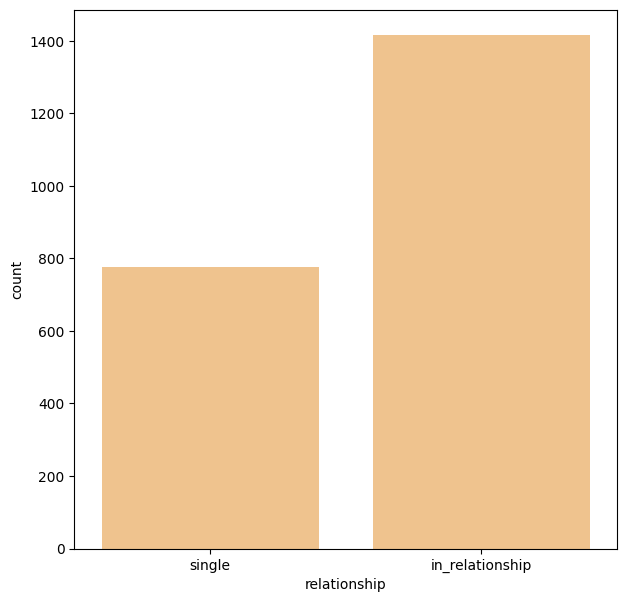

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(data,x='relationship',color=palette[2])

### observations

the number of people in relationship are higher compared to single customers

In [13]:
#Segmenting education levels in three groups
data["Education_Level"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [14]:
# counting the total number of people in the household
data['children']=data['Kidhome']+data['Teenhome']

In [15]:
# creating single column for accepted column
data['AcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3']
+ data['AcceptedCmp4'] + data['AcceptedCmp5'] 

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Length: 2190, dtype: int64

In [16]:
data['AcceptedCmp'].value_counts()

AcceptedCmp
0    1900
1     252
2      35
3       3
Name: count, dtype: int64

In [29]:
data['Response'].value_counts()

Response
0    1860
1     330
Name: count, dtype: int64

In [17]:
# summing up the total number of purchases 
data['num_purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [18]:
# calculating the total expenses
data['expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] 
+ data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

0       348
1         9
2       174
3        18
4        88
       ... 
2235    407
2236      8
2237     68
2238    171
2239     24
Length: 2190, dtype: int64

### observations

-- since we have aggregated few columns, we can drop the unnecessary columns

In [19]:
#dropping unnecessary columns
data.drop(labels=['Marital_Status','ID','Year_Birth'
                  ,'Dt_Customer', 'Kidhome','Teenhome',
                  'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2','Z_CostContact', 'Z_Revenue',"Recency", "Complain",'Education','Response','AcceptedCmp'], axis=1, inplace=True)

In [20]:
data.columns

Index(['Income', 'Age', 'relationship', 'Education_Level', 'children',
       'num_purchases', 'expenses'],
      dtype='object')

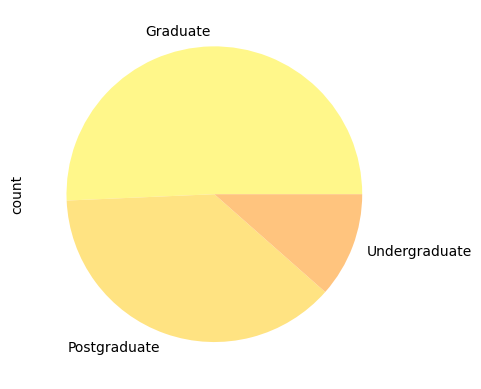

In [21]:
#parplot of eduction
plt.plot(figsize=(10,10))
data.Education_Level.value_counts().plot(kind='pie',colors=palette)
plt.show()

###Observations

-- number of graduates are higher compared to post graduates and under graduates

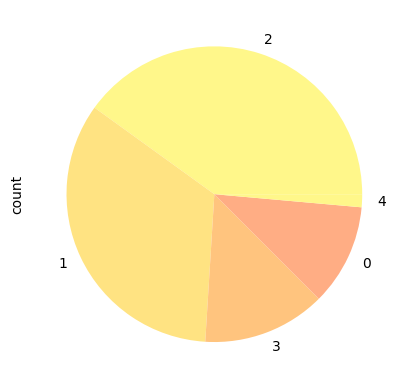

In [33]:
#numbers of members in family.
plt.plot(figsize=(10,10))
data.children.value_counts().plot(kind='pie',colors=palette)
plt.show()

In [44]:
data.head()

,Education,Income,Response,Age,relationship,members_home,AcceptedCmp,num_purchases,expenses,Education_Level
0,Graduation,58138.0,1,67,single,0,0,25,1269,Graduate
1,Graduation,46344.0,0,70,single,2,0,6,18,Graduate
2,Graduation,71613.0,0,59,in_relationship,1,0,21,602,Graduate
3,Graduation,26646.0,0,40,in_relationship,2,0,8,35,Graduate
4,PhD,58293.0,0,43,in_relationship,2,0,19,334,Postgraduate


In [112]:
## saving it to the new file

data.to_csv("E:\\projects\\internship_project\\notebooks\\data\\cleaned_data.csv",index=False)